# A ) DATA GATHERING AND CLEANING 

The data for our analysis comes from 4 different datasets, our first activity was to clean all of them and structure them in a single useful dataset with all the needed fields to analyze it further.

1. All of our data was extracted from kaggle, data can be found in the following links:
2. Horse Racing in Hong Kong - https://www.kaggle.com/gdaley/hkracing  
3. Hong Kong Horse Racing Results 2014-2017 -https://www.kaggle.com/lantanacamara/hong-kong-horse-racing  

Our raw data consist of the following files:

### 1st set of data:
- races.csv - each row represents a race, data can be merged without problem with race_id.
- runs.csv - each row represents a horse in a race, data can be merged using race_id.

### 2nd set of data:
- result-race.csv - each row represents a race, data can be merged without problem with race_id
- result-horse.csv - each row represents a horse in a race, data can be merged using race_id.



------------------------------------------------
### 1 - Importing necessary libraries for our analysis 

In [1]:
import pandas as pd
import datetime
import scipy.stats as sts
import matplotlib.pyplot as plt
import numpy as np

------------------------------------------------
### 2 - Loading all the necessary datasets into pandas dataframes and getting their columns.

In [2]:
race_hk1_org = pd.read_csv("datasets/races.csv")
race_horse_hk1_org = pd.read_csv("datasets/runs.csv")
race_hk2_org = pd.read_csv("datasets/race-result-race.csv")
race_horse_hk2_org = pd.read_csv("datasets/race-result-horse.csv")

print(race_hk1_org.columns)
print(race_horse_hk1_org.columns)
print(race_hk2_org.columns)
print(race_horse_hk2_org.columns)

Index(['race_id', 'date', 'venue', 'race_no', 'config', 'surface', 'distance',
       'going', 'horse_ratings', 'prize', 'race_class', 'sec_time1',
       'sec_time2', 'sec_time3', 'sec_time4', 'sec_time5', 'sec_time6',
       'sec_time7', 'time1', 'time2', 'time3', 'time4', 'time5', 'time6',
       'time7', 'place_combination1', 'place_combination2',
       'place_combination3', 'place_combination4', 'place_dividend1',
       'place_dividend2', 'place_dividend3', 'place_dividend4',
       'win_combination1', 'win_dividend1', 'win_combination2',
       'win_dividend2'],
      dtype='object')
Index(['race_id', 'horse_no', 'horse_id', 'result', 'won', 'lengths_behind',
       'horse_age', 'horse_country', 'horse_type', 'horse_rating',
       'horse_gear', 'declared_weight', 'actual_weight', 'draw',
       'position_sec1', 'position_sec2', 'position_sec3', 'position_sec4',
       'position_sec5', 'position_sec6', 'behind_sec1', 'behind_sec2',
       'behind_sec3', 'behind_sec4', 'behind_s

--------------------------------------------------------------
### 3 - Choosing only the necessary fields from each dataframe for our analysis.    
    

In [3]:
race_hk1 = race_hk1_org[[
            "race_id", "date", "race_no", "config", "surface", "distance", "going", "horse_ratings",
            "prize", "race_class", 

            ]]

race_hk2 = race_hk2_org[["race_date", "race_course", "race_number", "race_id", "race_class", 
                         "track_condition", "race_name", "track"
                        ]]
    

race_horse_hk1 = race_horse_hk1_org[[
             "race_id", "horse_no", "horse_id", "result", "won", "lengths_behind", "horse_age", 
             "horse_country", "horse_type", "horse_rating", "horse_gear", "declared_weight", "actual_weight",
             "draw", "finish_time", "win_odds", "place_odds"
             ]]

race_horse_hk2 = race_horse_hk2_org[["horse_number", "horse_name", "horse_id", "jockey", "trainer", 
                                     "race_id"
                      ]]


--------------------------------------------------------------
### 4 - Merging similar dataframes
    race_hk1 - race_horse_hk1
    race_hk2 - race_horse_hk2 
    
    Printing the number of rows on each dataset before and after the merge is helping us to determine 2 things:
    
    There is a one to many relationship between (race - race_horse hk1) and (race - race_horse hk2).
    data is complete because records are not being filtered due to inner join in the merge functions.


In [4]:
print(f"Before merging")
print(len(race_hk1))
print(len(race_horse_hk1))
print(len(race_hk2))
print(len(race_horse_hk2))

races_merged_hk1 = pd.merge(race_hk1, race_horse_hk1, on="race_id")
races_merged_hk2 = pd.merge(race_hk2, race_horse_hk2, on="race_id")

print(f"After merging")
print(len(races_merged_hk1))
print(len(races_merged_hk2))

Before merging
6349
79447
2367
30189
After merging
79447
30189


--------------------------------------------------------------
### 5 - Dropping empty values on horse_number

    Explanation: horse_number shows the assigned number of a horse in a specific race, when a horse  doesn't have a number but a code it means that the horse dind't finish the career or didn't participate at all.
    Indicent codes that were in this field:
    DISQ - Disquialified
    DNF - Did not finish
    FE - Horse fell during the race
    PU - Pulled Up
    TNP - Took no part
    UR - Unseated raider
    VOID - Void RACE
    WR - Withdrawn by starter
    WV/WV-A - Withdrawn on veterinary grounds
    WX/WX-A - Withdrawn by order of stewards
    WXNR - Withdrawn-non runner

In [5]:
races_merged_hk2 = races_merged_hk2.dropna(subset=['horse_number'])
print(len(races_merged_hk2))

29851


--------------------------------------------------------------
### 6 - Determining unique fields in a row of our dataset to understand exaclty what we were analyzing.

    Both of our datasets are representing a single horse on a single day race of the 8-11 races that may happen during the day
    
    race_id - Id of the race/event on a single day.
    race_no - number of race, of the minimun 8 and maximun 11 that may happen that day. 
    horse_no - number of horse for that specific race_no on that specific race_id, a horse may participate on some or all races during that day.

In [6]:
print(len(races_merged_hk1[["race_id", "race_no", "horse_no"]].drop_duplicates()))
print(len(races_merged_hk2[["race_id", "race_number", "horse_number"]].drop_duplicates()))

79447
29851


--------------------------------------------------------------
### 7 - Joining both datasets from different sources with apparently no matching fields.

    As both datasets (2 tables per dataset) were loaded from different Kaggle source and both of them had slightly different fields, we were trying to choose one of them, however we wanted to see if both of them could be joined.
    
    Trying to join them by race_id didn't work at all
    
    why?
    
    Because both of them were using a very different nomenclature for the race_id, after investigating further and trying to join them using different fields without sucess we were about to give up, however reading in kaggle we found out that one of the datasets (races_merged_hk1 source files) were deliberately obfuscated by the owner to not show sensible information regarding dates, horse names, trainer and jockeys.
    
    In a thread in Kaggle we found out the answer coming from the creator of the dataset, he applied a - pd.to_timedelta('4123 days') to all dates, therefore re adjusting the date using the same function would allow us to join  datasets correctly by 3 fields:
    
    race date - only a race/event is run during a single day
    race no - unique identifier of a race on a race/event
    horse no - horses have a unique identifier for each race
    
    In order to do this we had to tweak and correct/convert a little bit our data

In [7]:
races_merged_hk1["date"] = pd.to_datetime(races_merged_hk1["date"]) + pd.to_timedelta('4123 days')
races_merged_hk2["horse_number"] = races_merged_hk2["horse_number"].astype(int)
races_merged_hk2["race_date"] = pd.to_datetime(races_merged_hk2["race_date"])
print(races_merged_hk1[["race_no", "horse_no", "distance", "actual_weight", "date"]].dtypes)
print(races_merged_hk2[["race_number", "horse_number", "race_date"]].dtypes)

race_no                   int64
horse_no                  int64
distance                  int64
actual_weight             int64
date             datetime64[ns]
dtype: object
race_number              int64
horse_number             int64
race_date       datetime64[ns]
dtype: object


--------------------------------------------------------------
### 8 - Joining both datasets by race number, horse number and race date.

In [8]:
final_df = pd.merge(races_merged_hk1, races_merged_hk2, how="inner", left_on = ["race_no", "horse_no", "date"],
                   right_on = ["race_number", "horse_number", "race_date"])

final_df.count()

final_df.to_csv("final.csv")

--------------------------------------------------------------
### 9 - Validating our final dataframe

    How do we know that the join was a sucess?
    
    Joining both datasets with a inner join produced a dataframe of 22544, we could say that this fields are indeed complete and there is almost no missing information.
    
    What we won?
    
    Additional fields from both datasets and qualitative information regarding Jockeys, trainers and horse names.
    
    what we lost?
    
    around 50,000 records of data that had races before 2014, in fact our dataset has careers from 2014-2016
    
   
    We came to the conclusion that having 22544 of full data was good for our analysis, also the 3 important fields that are representing a single record in our dataset shows that we do not have repetitive/wrong data

In [9]:
print(len(final_df))
print(len(final_df[["race_id_x", "race_no", "horse_no"]].drop_duplicates()))
print(final_df["date"].min())
print(final_df["date"].max())
final_df.columns

22544
22544
2014-09-14 00:00:00
2016-12-11 00:00:00


Index(['race_id_x', 'date', 'race_no', 'config', 'surface', 'distance',
       'going', 'horse_ratings', 'prize', 'race_class_x', 'horse_no',
       'horse_id_x', 'result', 'won', 'lengths_behind', 'horse_age',
       'horse_country', 'horse_type', 'horse_rating', 'horse_gear',
       'declared_weight', 'actual_weight', 'draw', 'finish_time', 'win_odds',
       'place_odds', 'race_date', 'race_course', 'race_number', 'race_id_y',
       'race_class_y', 'track_condition', 'race_name', 'track', 'horse_number',
       'horse_name', 'horse_id_y', 'jockey', 'trainer'],
      dtype='object')

--------------------------------------------------------------
### 10 - Finally we renamed the columns to have a common dataset to work separately as a team.

In [10]:
final_df=final_df.rename(columns={"race_id_x":"Race_id",
                                 "date":"Date",
                                 "race_no":"Race_no",
                                 "distance":"Distance",
                                 "going":"Surface_condition",
                                 "prize":"Prize",
                                 "horse_no":"Horse_no",
                                 "horse_id_y":"Horse_id",
                                 "result":"Final_position",
                                 "won":"Won",
                                 "horse_age":"Horse_age",
                                 "horse_country":"Horse_country",
                                 "horse_type":"Horse_type",
                                 "actual_weight":"Actual_weight",
                                 "finish_time":"Finish_time",
                                 "race_course":"Course",
                                 "race_class_x":"Class",                                
                                 "race_name":"Race_name",
                                 "track":"Track",
                                 "horse_name":"Horse_name",
                                 "jockey":"Jockey",
                                 "trainer":"Trainer",
                                 "declared_weight":"Declared_weight",
                                 })
final_df.columns

Index(['Race_id', 'Date', 'Race_no', 'config', 'surface', 'Distance',
       'Surface_condition', 'horse_ratings', 'Prize', 'Class', 'Horse_no',
       'horse_id_x', 'Final_position', 'Won', 'lengths_behind', 'Horse_age',
       'Horse_country', 'Horse_type', 'horse_rating', 'horse_gear',
       'Declared_weight', 'Actual_weight', 'draw', 'Finish_time', 'win_odds',
       'place_odds', 'race_date', 'Course', 'race_number', 'race_id_y',
       'race_class_y', 'track_condition', 'Race_name', 'Track', 'horse_number',
       'Horse_name', 'Horse_id', 'Jockey', 'Trainer'],
      dtype='object')

# B ) DATA EXPLORATION


We began exploring the data trying to understand it and plotting different graphics, this in turn helped us to determine what was going to be the objective of our analysis: What factors influece on the final result of a horse? is it possible to predict the outcome?

In [ ]:
def plotHistogramSeries(df, ylabel, xlabel, title, xSize, ySize, color):
    graph = df.plot(kind="bar", figsize=(xSize,ySize), color=color, title=title)
    graph.set_ylabel(ylabel)
    graph.set_xlabel(xlabel)

In [22]:
# CREATING A DATAFRAME WITH UNIQUE RACES/EVENTS
dist_df = final_df[["Race_id", "Date", "Course", "Race_no", "config", 
                    "surface", "Distance", "Surface_condition","Prize","Class",
                    "Track", "Race_name", "track_condition", "race_class_y"
                   ]].drop_duplicates()

# EXTRACTING YEAR AND MONTH
dist_df["YR"] = pd.DatetimeIndex(dist_df["Date"]).year
dist_df["MONTH"] = pd.DatetimeIndex(dist_df["Date"]).month


# PRINT NUMBER OF UNIQUE RACES/EVENTS
dist_df.count()
len(dist_df["Race_id"].drop_duplicates())


1801

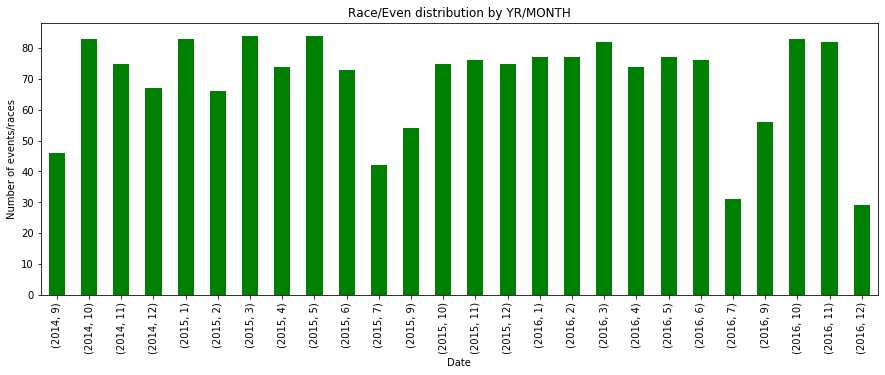

In [37]:
group_date = dist_df.groupby(["YR", "MONTH"]).size()
plotHistogramSeries (group_date, "Number of events/races", "Date", "Race/Even distribution by YR/MONTH", 15,5,"g")

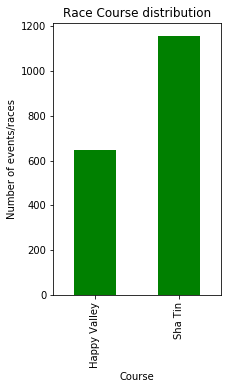

In [38]:
group_track = dist_df.groupby("Course").size()
plotHistogramSeries (group_track, "Number of events/races", "Course", "Race Course distribution", 3,5,"g")

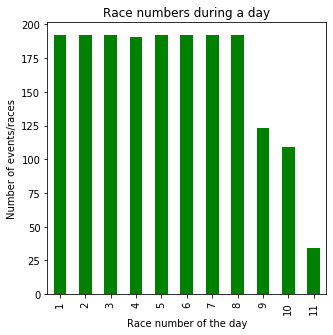

In [41]:
group_race = dist_df.groupby("Race_no").size()
plotHistogramSeries (group_race, "Number of events/races", "Race number of the day", "Race numbers during a day", 5,5,"g")

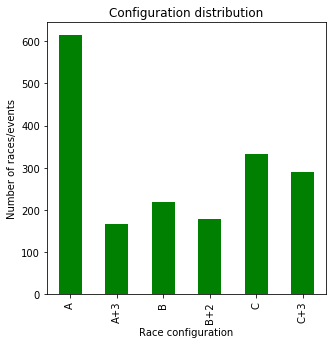

In [43]:
group_config = dist_df.groupby("config").size()
plotHistogramSeries (group_config, "Number of races/events", "Race configuration", "Configuration distribution", 5,5,"g")

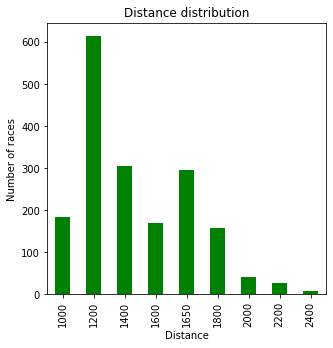

In [44]:
group_distance = dist_df.groupby("Distance").size()
plotHistogramSeries (group_distance, "Number of races", "Distance", "Distance distribution", 5,5,"g")


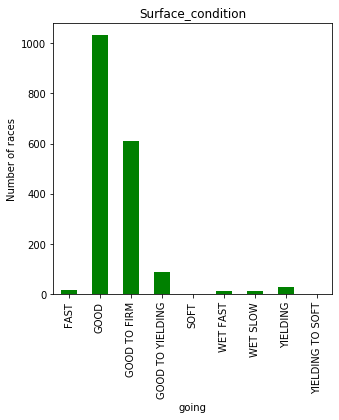

In [45]:
group_going = dist_df.groupby("Surface_condition").size()
plotHistogramSeries (group_going, "Number of races", "going", "Surface_condition", 5,5,"g")

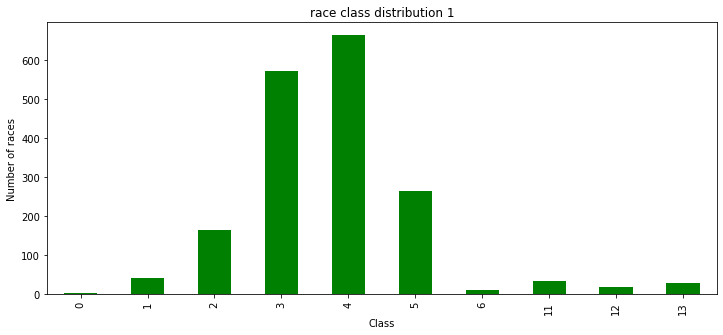

In [46]:
group_class = dist_df.groupby("Class").size()
plotHistogramSeries (group_class, "Number of races", "Class", "race class distribution 1", 12,5,"g")

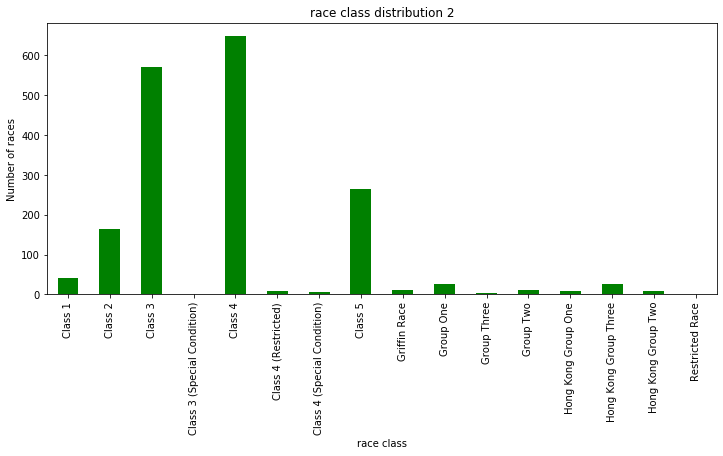

In [47]:
group_class = dist_df.groupby("race_class_y").size()
plotHistogramSeries (group_class, "Number of races", "race class", "race class distribution 2", 12,5,"g")

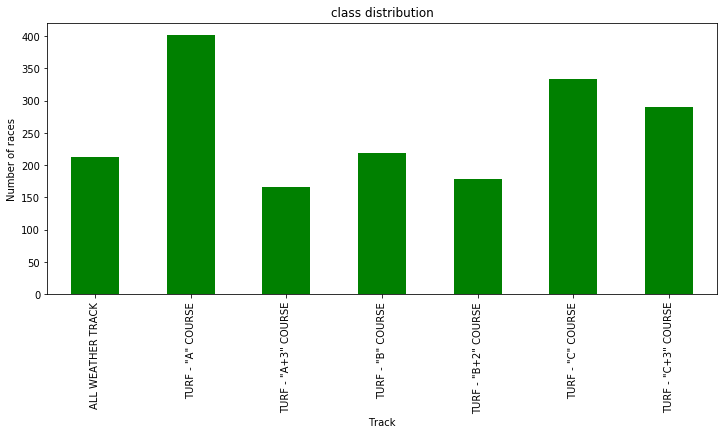

In [48]:
group_track = dist_df.groupby("Track").size()
plotHistogramSeries (group_track, "Number of races", "Track", "class distribution", 12,5,"g")

In [63]:
#ADDITIONAL FUNCTIONS TO NOT REPEAT CODE

def  plotScatter(df, xVar, yVar, title, xlabel, ylabel, color):
    sp = df.plot(kind="scatter", x=xVar,y=yVar, c=color, title=title)
    sp.set(xlabel = xlabel, ylabel = ylabel)
    sp.grid()
    return sp


def  linearRegress(df, xVar, yVar, title, xlabel, ylabel, xShow, yShow, color):
    (slope, intercept, rvalue, pvalue, stderr) = sts.linregress(df[xVar],df[yVar])
    rgrs_values = df[xVar] * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    graph = plotScatter(df, xVar, yVar, title,xlabel, ylabel, color)
    plt.plot(df[xVar],rgrs_values, '-r')
    plt.annotate(line_eq,(xShow,yShow),fontsize=15)
    print(f"The r-squared is: {rvalue**2}")
    return graph

# C ) MARTIN ANALYSIS OF THE DATASET

    Martin applied the following analysis
    - Winning rate of horses by country.
    - Comparasion between Horse rating and actual weight by horse ratings
    - Distribution of actual weight/declared weight among the dataset
    - Winning odds vs draw
    - Donut with revenue percentage

In [49]:
ctry=round(pd.DataFrame(final_df.groupby("Horse_country")["Won"].mean())*100,2)
ctry=ctry.rename(columns={"Won":"Win Rate","Horse_country":"Country"})
ctry["# of Horses"]=final_df.groupby("Horse_country")["Horse_id"].count()
ctry=ctry.sort_values(by="Win Rate",ascending=False)
saf=final_df.query("Horse_country=='SAF'")
safmode=saf["Actual_weight"].mode()
ctry

,Win Rate,# of Horses
Horse_country,,
SAF,9.01,222
AUS,8.58,8657
JPN,8.47,59
NZ,8.32,6872
USA,7.73,686
GB,7.59,2054
IRE,6.87,3190
ARG,5.88,17
ITY,5.26,57


In [50]:
rr=final_df.drop_duplicates("Horse_id")
r40=rr.query("horse_rating<40")
r60=rr.query("horse_rating>40 and horse_rating<=60")
r80=rr.query("horse_rating>60 and horse_rating<=80")
r100=rr.query("horse_rating>80 and horse_rating<=100")

The r-squared is: 0.9457299260263177


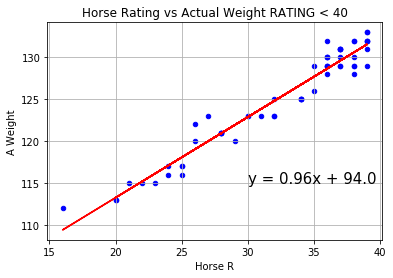

In [71]:
linearRegress(r40, "horse_rating", "Actual_weight", "Horse Rating vs Actual Weight RATING < 40", "Horse R", "A Weight", 
              30, 115,"b")

The r-squared is: 0.02145199897308221


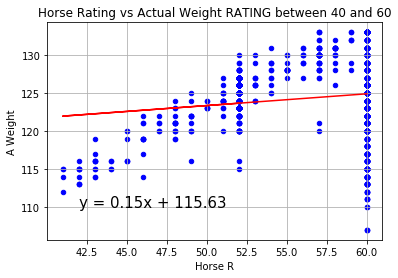

In [72]:
linearRegress(r60, "horse_rating", "Actual_weight", "Horse Rating vs Actual Weight RATING between 40 and 60", "Horse R", "A Weight", 
              42, 110,"b")

The r-squared is: 0.7434034961800767


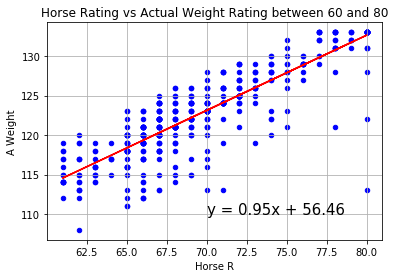

In [73]:
linearRegress(r80, "horse_rating", "Actual_weight", "Horse Rating vs Actual Weight Rating between 60 and 80", "Horse R", "A Weight", 
              70, 110,"b")

The r-squared is: 0.06423985048884101


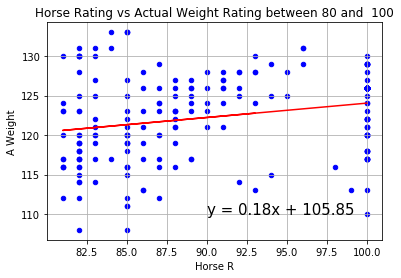

In [75]:
linearRegress(r100, "horse_rating", "Actual_weight", "Horse Rating vs Actual Weight Rating between 80 and  100", "Horse R", "A Weight", 
              90, 110,"b")

In [76]:
rating=final_df
bins=[0,40,60,80,150]
labels=["0-40","41-60","61-80","81-130"]
ratings=pd.DataFrame(pd.cut(rating["horse_rating"],bins=bins,labels=labels).value_counts())
#ratings['Rate of Won races']=round(rating.groupby(pd.cut(rating["horse_rating"],bins=bins,labels=labels)).agg({'Won':'mean'})*100,2)
ratings['Declared weight mean (lb)']=round(rating.groupby(pd.cut(rating["horse_rating"],bins=bins,labels=labels)).agg({'Declared_weight':'mean'}),2)
ratings['Actual weight mode (lb)']=[129,125,120,126]
ratings['Prize $']=rating.groupby(pd.cut(rating["horse_rating"],bins=bins,labels=labels)).agg({'Prize':'mean'})
ratings['Prize $']=ratings['Prize $'].apply(lambda x: '%.0f' % x)
ratings=ratings.sort_index()
ratings=ratings.rename(columns={"horse_rating":"Number of Horses"})
ratings

,Number of Horses,Declared weight mean (lb),Actual weight mode (lb),Prize $
0-40,2640,1091.21,126,606405
41-60,10116,1107.12,129,897403
61-80,6477,1111.82,125,1145580
81-130,3311,1122.49,120,3272810


In [77]:
ratctry=list()
threetop=["SAF","AUS","JPN"]
for country in threetop:
    ct=final_df.query(f"Horse_country=='{country}'")
    rtct=pd.DataFrame(pd.cut(ct["horse_rating"],bins=bins,labels=labels).value_counts())
    rtct['Rate of Won races']=round(ct.groupby(pd.cut(ct["horse_rating"],bins=bins,labels=labels)).agg({'Won':'mean'})*100,2)
    rtct['Country']=country
    ratctry.append(rtct)    
ratctry[0]=ratctry[0].sort_values("Rate of Won races",ascending=False)
ratctry[1]=ratctry[1].sort_values("Rate of Won races",ascending=False)
ratctry[2]=ratctry[2].sort_values("Rate of Won races",ascending=False)
del ratctry[0]["horse_rating"],ratctry[1]["horse_rating"],ratctry[2]["horse_rating"]
ratctry[0]=ratctry[0].reset_index()
ratctry[1]=ratctry[1].reset_index()
ratctry[2]=ratctry[2].reset_index()
saf=ratctry[0].query("index=='81-130' or index=='41-60'")
aus=ratctry[1].query("index=='81-130' or index=='61-80'")
jpn=ratctry[2].query("index=='81-130'")
saf=saf.append(aus)
saf=saf.append(jpn)
saf=saf.sort_values("Rate of Won races",ascending=False).reset_index()
del saf["level_0"]
saf=saf.rename(columns={"index":"Horse Rating"})

In [78]:
jpn=final_df.query("Horse_country=='JPN' or horse_rating=='81-130'")
saf1=final_df.query("Horse_country=='SAF' or horse_rating=='81-130'")
saf2=final_df.query("Horse_country=='SAF' or horse_rating=='41-60'")
aus1=final_df.query("Horse_country=='AUS' or horse_rating=='81-130'")
aus2=final_df.query("Horse_country=='JPN' or horse_rating=='61-80'")

jpnmode=jpn["Actual_weight"].mode()
jpnmean=round(jpn["Declared_weight"].mean(),2)

safmode=saf1["Actual_weight"].mode()
safmean=round(saf1["Declared_weight"].mean(),2)

saf1mode=saf2["Actual_weight"].mode()
saf1mean=round(saf2["Declared_weight"].mean(),2)

ausmode=aus1["Actual_weight"].mode()
ausmean=round(aus1["Declared_weight"].mean(),2)

aus1mode=aus2["Actual_weight"].mode()
aus1mean=round(aus2["Declared_weight"].mean(),2)

mode=[126,119,119,133,126]
mean=[jpnmean,safmean,saf1mean,ausmean,aus1mean]
saf["Actual weight mode (lb)"]=mode
saf["Declared weight mean (lb)"]=mean
saf

,Horse Rating,Rate of Won races,Country,Actual weight mode (lb),Declared weight mean (lb)
0,81-130,17.86,JPN,126,1055.07
1,81-130,16.67,SAF,119,1089.87
2,41-60,10.53,SAF,119,1089.87
3,81-130,9.90,AUS,133,1117.61
4,61-80,9.65,AUS,126,1055.07


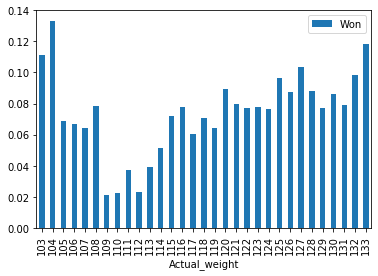

In [79]:
P=pd.DataFrame(final_df.groupby('Actual_weight')['Won'].mean())
P.plot.bar()
plt.show()

In [80]:
gelding=final_df.query("Horse_type=='Gelding'")
mare=final_df.query("Horse_type=='Mare'")
horse=final_df.query("Horse_type=='Horse'")
brown=final_df.query("Horse_type=='Brown'")
rig=final_df.query("Horse_type=='rig'")
colt=final_df.query("Horse_type=='Colt'")
roan=final_df.query("Horse_type=='Roan'")

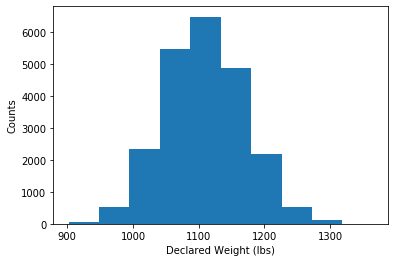

NormaltestResult(statistic=56.9399069410686, pvalue=4.3217168331487684e-13)
The variance is: 3680.6628462305125


In [81]:
plt.hist(final_df["Declared_weight"])
plt.xlabel('Declared Weight (lbs)')
plt.ylabel('Counts')
plt.show()
print(sts.normaltest(final_df["Declared_weight"]))
var=np.var(final_df["Declared_weight"])
std=np.std(final_df["Declared_weight"])
mean=np.mean(final_df["Declared_weight"])
median=np.median(final_df["Declared_weight"])
mode=sts.mode(final_df["Declared_weight"])
print(f"The variance is: {var}")

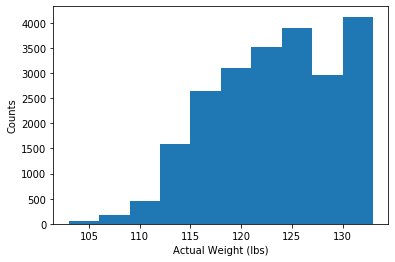

NormaltestResult(statistic=1402.8618908307797, pvalue=2.35727890579134e-305)
The variance is: 39.31338828538831


In [82]:
plt.hist(final_df["Actual_weight"])
plt.xlabel('Actual Weight (lbs)')
plt.ylabel('Counts')
plt.show()
print(sts.normaltest(final_df["Actual_weight"]))
var=np.var(final_df["Actual_weight"])
std=np.std(final_df["Actual_weight"])
mean=np.mean(final_df["Actual_weight"])
median=np.median(final_df["Actual_weight"])
mode=sts.mode(final_df["Actual_weight"])
print(f"The variance is: {var}")

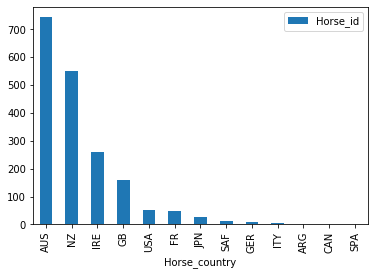

In [83]:
racecount=pd.DataFrame(final_df.groupby("Horse_id")["Race_id"].count())
hor=final_df.drop_duplicates("Horse_id")
country=pd.DataFrame(hor.groupby("Horse_country")["Horse_id"].count())
country=country.sort_values(by="Horse_id",ascending=False)
BarPandas=country.plot.bar()

The r-squared is: 0.8324388888221225


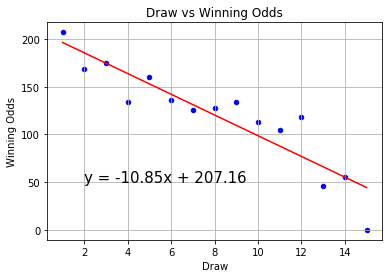

In [88]:
linearRegress(t, "draw", "Won", "Draw vs Winning Odds", "Draw", "Winning Odds", 
              2, 50,"b")

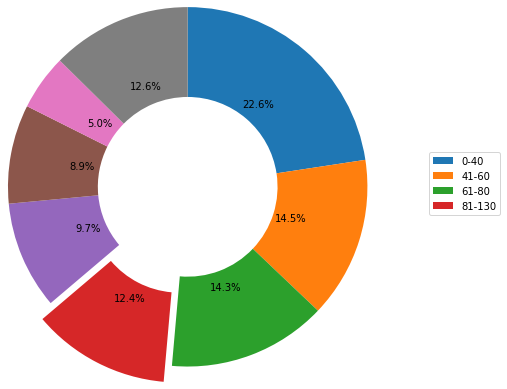

In [127]:
otros=100-(22.6+14.5+14.3+12.4+9.7+8.9+5)
fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))
data = [22.6,14.5,14.3,12.4,9.7,8.9,5,otros]
explode = (0, 0 , 0, 0.2,0,0,0,0)
pie = ax.pie(data, wedgeprops=dict(width=1), startangle=90,autopct="%1.1f%%",radius=2,counterclock=False,explode=explode)
plt.legend(pie[0],labels, bbox_to_anchor=(1,0.5), loc="center right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure)
plt.subplots_adjust(left=0.0, bottom=0.1, right=0.53)
plt.savefig("DonutCountry.png")
plt.show()

# D ) MARIO ANALYSIS OF THE DATASET

    Mario applied the following analysis
    - Speed calculation of each horse by race
    - Comparation between Actual Weight vs speed
    - Comparation between Declared Weight vs speed
    - Comparation between Distance vs speed
    - Comparation between classes (1-5) vs speed
    - Cmparation betwee weight vs class

In [90]:
final_df["speed_mseg"] = final_df["Distance"]  / final_df["Finish_time"]

In [102]:
# Generate a scatter 
#filtered_df = final_df.loc[final_df["Class"] == 5]
filtered_df = final_df
df = filtered_df.groupby(["Actual_weight"])["speed_mseg"].mean()
df = df.reset_index()
df

,Actual_weight,speed_mseg
0,103,16.620395
1,104,16.768084
2,105,16.791367
3,106,16.788907
4,107,16.786250
5,108,16.803952
6,109,16.806557
7,110,16.838206
8,111,16.725149
9,112,16.759844


The r-squared is: 0.008283203344880908


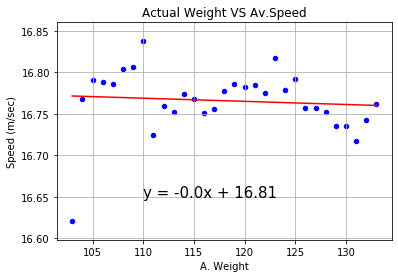

In [103]:
linearRegress(df, "Actual_weight", "speed_mseg", "Actual Weight VS Av.Speed", "A. Weight", "Speed (m/sec)", 
              110, 16.65,"b")

In [104]:
# Generate a scatter 
df = final_df.groupby(["Declared_weight"])["speed_mseg"].mean()
df = df.reset_index()
df

,Declared_weight,speed_mseg
0,902.0,16.556291
1,905.0,16.248154
2,914.0,16.453382
3,915.0,16.168149
4,916.0,16.375234
...,...,...
385,1313.0,17.035775
386,1315.0,17.424132
387,1318.0,16.692500
388,1326.0,15.989340


The r-squared is: 0.5027282856869126


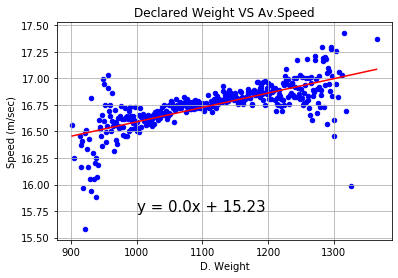

In [105]:
linearRegress(df, "Declared_weight", "speed_mseg", "Declared Weight VS Av.Speed", "D. Weight", "Speed (m/sec)", 
              1000, 15.75,"b")

The r-squared is: 0.9018089065102025


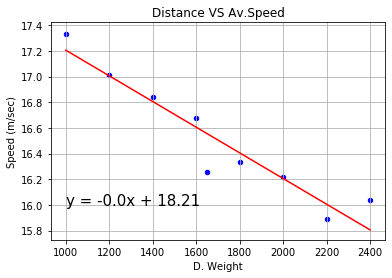

In [107]:
df = final_df.groupby(["Distance"])["speed_mseg"].mean()
df = df.reset_index()

linearRegress(df, "Distance", "speed_mseg", "Distance VS Av.Speed", "Distance", "Speed (m/sec)", 
              1000, 16,"b")

The r-squared is: 0.9684934006813904


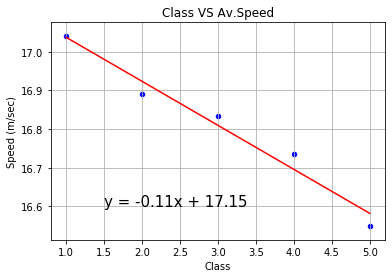

In [111]:
filtered_df = final_df.loc[(final_df["Class"] < 6) & (final_df["Class"] != 0)]
df = filtered_df.groupby(["Class"])["speed_mseg"].mean()
df = df.reset_index()

linearRegress(df, "Class", "speed_mseg", "Class VS Av.Speed", "Class", "Speed (m/sec)", 
              1.5, 16.6,"b")

The r-squared is: 0.9317394352202324


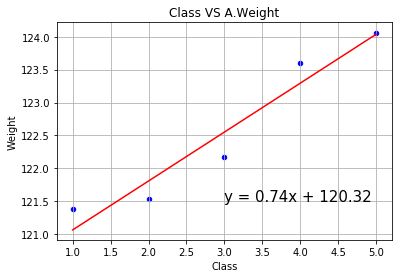

In [115]:
filtered_df = final_df.loc[(final_df["Class"] < 6) & (final_df["Class"] != 0)]
df = filtered_df.groupby(["Class"])["Actual_weight"].mean()
df = df.reset_index()

linearRegress(df, "Class", "Actual_weight", "Class VS A.Weight", "Class", "Weight", 
              3, 121.5,"b")

# D ) JORGE ANALYSIS OF THE DATASET

    - Overall analysis to explore the data (shown in B data exploration)
    - Winning rate distribution vs A. Weight
    - Ranking of horses with more race wins
    - Ranking of Jockeys with more races wins
    - Ranking of trainers with more races wins

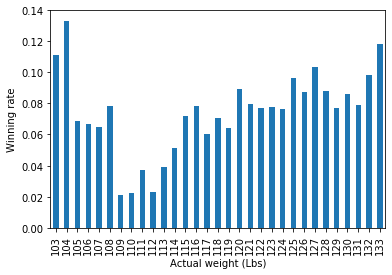

In [116]:
# Checking if weight has something ot do with winning
weight = final_df.groupby("Actual_weight")["Won"].mean()
weight.plot.bar()
plt.xlabel("Actual weight (Lbs)")
plt.ylabel("Winning rate")
plt.show()

In [117]:
# Looking up the horses that have won the most
winnings = final_df.query("Won == 1")
horses_win = winnings["Horse_name"].value_counts()
horses_win.head()


CONTENTMENT          9
ABLE FRIEND          7
TRILLION TREASURE    7
BLIZZARD             7
SUN JEWELLERY        7
Name: Horse_name, dtype: int64

The r-squared is: 0.04814860920923414


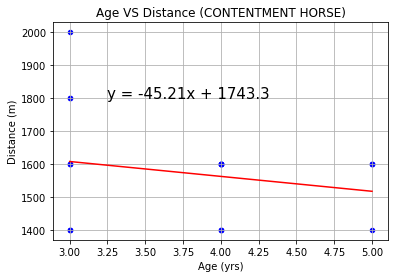

In [122]:
#Finding all data for the most profitable horse in the racing history
horse_1 = final_df[final_df["Horse_name"] == "CONTENTMENT"]

linearRegress(horse_1, "Horse_age", "Distance", "Age VS Distance (CONTENTMENT HORSE)", "Age (yrs)", "Distance (m)", 
              3.25, 1800,"b")

The r-squared is: 0.12224176563359286


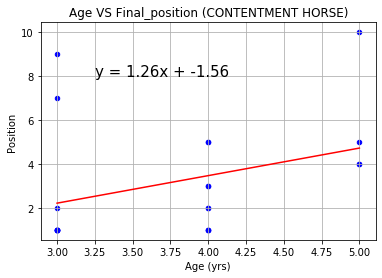

In [124]:
# Horse pposition along its life

linearRegress(horse_1, "Horse_age", "Final_position", "Age VS Final_position (CONTENTMENT HORSE)", "Age (yrs)", "Position", 
              3.25, 8,"b")

The r-squared is: 0.22517830773645175


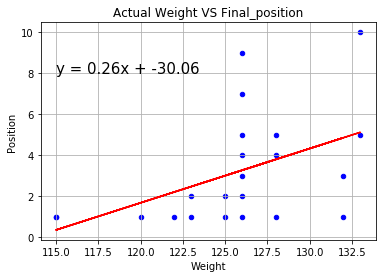

In [126]:
# Final position vs actual weight

linearRegress(horse_1, "Actual_weight", "Final_position", "Actual Weight VS Final_position", "Weight", "Position", 
              115, 8,"b")

The r-squared is: 0.011324246853393491


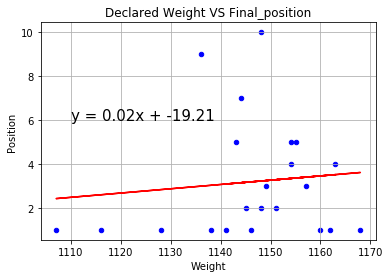

In [133]:
linearRegress(horse_1, "Declared_weight", "Final_position", "Declared Weight VS Final_position", "Weight", "Position", 
              1110, 6,"b")

The r-squared is: 0.11126979498718315


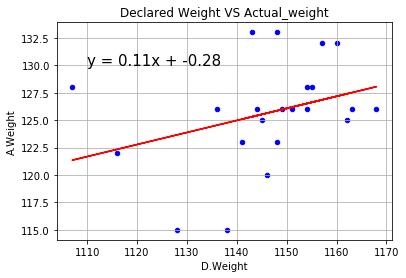

In [134]:
# Actual weight vs declared weight
linearRegress(horse_1, "Declared_weight", "Actual_weight", "Declared Weight VS Actual_weight", "D.Weight", "A.Weight", 
              1110, 130,"b")

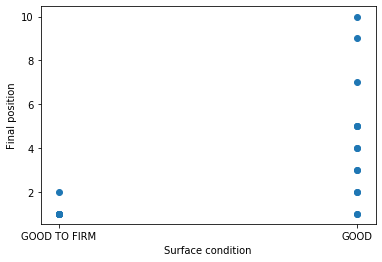

GOOD            14
GOOD TO FIRM     8
Name: Surface_condition, dtype: int64
1     9
5     3
2     3
4     2
3     2
10    1
9     1
7     1
Name: Final_position, dtype: int64


In [141]:
# Plotting the number of times the horse ran in a track with certain consitions
plt.scatter(horse_1["Surface_condition"], horse_1["Final_position"])

plt.xlabel("Surface condition")
plt.ylabel("Final position")
plt.show()

print(horse_1["Surface_condition"].value_counts())
print(horse_1["Final_position"].value_counts())

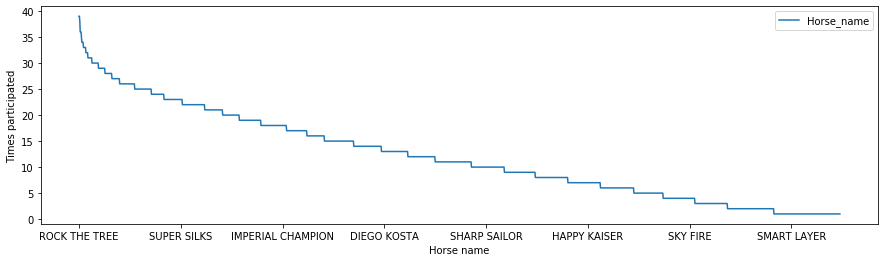

In [140]:
# Most frequent horses
final_df["Horse_name"].value_counts().plot(figsize = (15, 4))
plt.xlabel("Horse name")
plt.ylabel("Times participated")
plt.legend()
plt.show()

In [207]:
horse_name_df = pd.DataFrame(final_df.groupby(["Horse_id","Horse_name"])["Race_id"].count())
horse_name_df.reset_index()
horse_name_df.head()
horse_name_df["# Win"] = final_df.loc[final_df["Won"] == 1].groupby(["Horse_id","Horse_name"])["Won"].count()
horse_name_df["# Win"] = horse_name_df["# Win"].fillna(0)
horse_name_df["Winning rate (%)"] = horse_name_df["# Win"] / horse_name_df["Race_id"] * 100
horse_name_df = horse_name_df.rename(columns={"Race_id": "Participated"})
horse_name_df = horse_name_df.sort_values(by="Winning rate (%)", ascending=False).head(20)

horse_name_df

,,Participated,# Win,Winning rate (%)
Horse_id,Horse_name,,,
V638,CHAUTAUQUA,1,1.0,100.000000
A093,EAGLE WAY,1,1.0,100.000000
V356,WATER DIVINER,2,2.0,100.000000
V605,MAURICE,3,3.0,100.000000
T247,BAYONET,2,2.0,100.000000
V068,JUMBO LUCK,1,1.0,100.000000
S139,STAR TRACK,3,2.0,66.666667
A025,WINNER'S WAY,3,2.0,66.666667
V328,JING JING WIN,3,2.0,66.666667


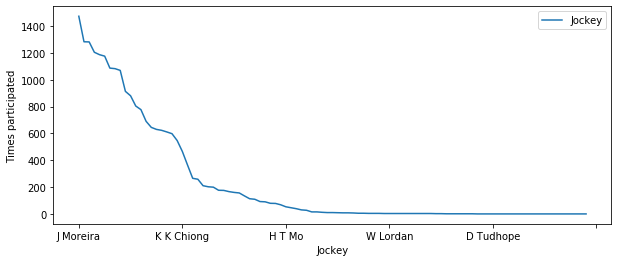

In [200]:
final_df["Jockey"].value_counts().plot(figsize = (10, 4))
plt.xlabel("Jockey")
plt.ylabel("Times participated")
plt.legend()
plt.show()

In [213]:
jockey_name_df = pd.DataFrame(final_df.groupby("Jockey")["Race_id"].count())
jockey_name_df.reset_index()
jockey_name_df.head()
jockey_name_df["# Win"] = final_df.loc[final_df["Won"] == 1].groupby("Jockey")["Won"].count()
jockey_name_df["# Win"] = jockey_name_df["# Win"].fillna(0)
jockey_name_df["Winning rate (%)"] = jockey_name_df["# Win"] / jockey_name_df["Race_id"] * 100
jockey_name_df = jockey_name_df.rename(columns={"Race_id": "Participated"})
jockey_name_df = jockey_name_df.sort_values(by="Winning rate (%)", ascending=False).head(20)

jockey_name_df

,Participated,# Win,Winning rate (%)
Jockey,,,
Y Fukunaga,6,2.0,33.333333
Y Take,4,1.0,25.000000
S Pasquier,4,1.0,25.000000
J Moreira,1472,364.0,24.728261
K Tosaki,10,2.0,20.000000
Z Purton,1204,201.0,16.694352
R Moore,135,19.0,14.074074
T Angland,16,2.0,12.500000
L Salles,8,1.0,12.500000


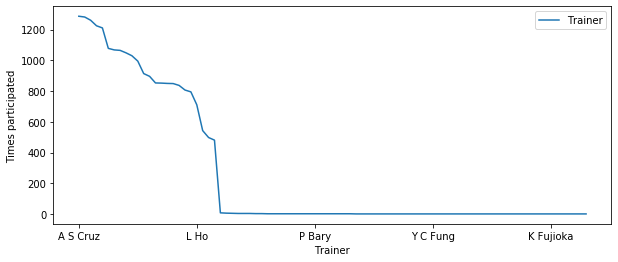

In [214]:
final_df["Trainer"].value_counts().plot(figsize = (10, 4))
plt.xlabel("Trainer")
plt.ylabel("Times participated")
plt.legend()
plt.show()

In [221]:
trainer_name_df = pd.DataFrame(final_df.groupby("Trainer")["Race_id"].count())
trainer_name_df.reset_index()
trainer_name_df.head()
trainer_name_df["# Win"] = final_df.loc[final_df["Won"] == 1].groupby("Trainer")["Won"].count()
trainer_name_df["# Win"] = trainer_name_df["# Win"].fillna(0)
trainer_name_df["Winning rate (%)"] = trainer_name_df["# Win"] / trainer_name_df["Race_id"] * 100
trainer_name_df = trainer_name_df.rename(columns={"Race_id": "Participated"})
trainer_name_df = trainer_name_df.sort_values(by="Winning rate (%)", ascending=False).head(20)

trainer_name_df

,Participated,# Win,Winning rate (%)
Trainer,,,
M Hawkes,1,1.0,100.000000
N Hori,6,4.0,66.666667
M Sakaguchi,2,1.0,50.000000
A P O'Brien,4,1.0,25.000000
A Fabre,4,1.0,25.000000
J Size,1068,151.0,14.138577
P O'Sullivan,849,97.0,11.425206
J Moore,1225,139.0,11.346939
C S Shum,1049,114.0,10.867493


# E ) SERGIO ANALYSIS OF THE DATASET

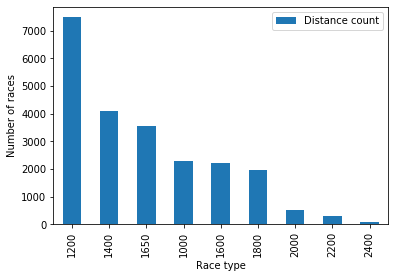

In [222]:
#Make the analisys for the race of 1200 m 
race_df=pd.DataFrame({"Distance count":final_df["Distance"].value_counts()})
race_df.plot(kind='bar')
plt.xlabel("Race type")
plt.ylabel("Number of races")
plt.show()

In [223]:
#Only filter the data for the race of 1200 
race_1200_df=final_df.loc[final_df["Distance"] == 1200]
race_1200_df = race_1200_df[['Won','Jockey','race_class_y','Surface_condition','Horse_name','Trainer']]
race_1200_df['Won'] = race_1200_df['Won'].astype('int64')

print(race_1200_df.dtypes)
race_1200_df.head()



Won                   int64
Jockey               object
race_class_y         object
Surface_condition    object
Horse_name           object
Trainer              object
dtype: object


,Won,Jockey,race_class_y,Surface_condition,Horse_name,Trainer
13,0,T H So,Class 5,GOOD TO FIRM,ALLEY-OOP,C W Chang
14,0,Z Purton,Class 5,GOOD TO FIRM,SPARKLING SWORD,K W Lui
15,0,M Chadwick,Class 5,GOOD TO FIRM,CALIFORNIA ROCK,A S Cruz
16,0,Y T Cheng,Class 5,GOOD TO FIRM,MONEY CAFE,C H Yip
17,0,O Doleuze,Class 5,GOOD TO FIRM,JOYFUL LUCK,C W Chang


In [224]:
race_1200_df["race_class_y"] = race_1200_df["race_class_y"].replace({"Class 4 (Restricted)":"Class 4","Class 4 (Special Condition)":"Class 4","Group One":"Group One and Two","Group Two":"Group One and Two","Hong Kong Group Two":"Hong Kong Group","Hong Kong Group One":"Hong Kong Group","Hong Kong Group Three":"Hong Kong Group"})
print( race_1200_df["race_class_y"].value_counts())

Class 4              3016
Class 3              2664
Class 5               771
Class 2               659
Class 1               131
Group One and Two     101
Hong Kong Group        89
Griffin Race           53
Name: race_class_y, dtype: int64


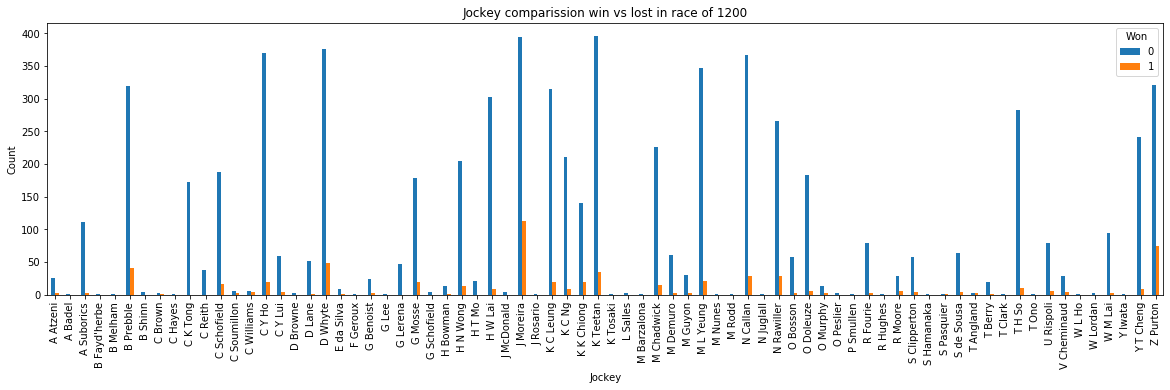

In [225]:
#Create a graph to look the jockey wins
#Jockey maybe is not the best variable to make the analisys 
pd.crosstab(race_1200_df["Jockey"],race_1200_df["Won"]).plot(kind='bar',figsize=(20,5))
plt.title("Jockey comparission win vs lost in race of 1200")
plt.xlabel("Jockey")
plt.ylabel("Count")
plt.show()



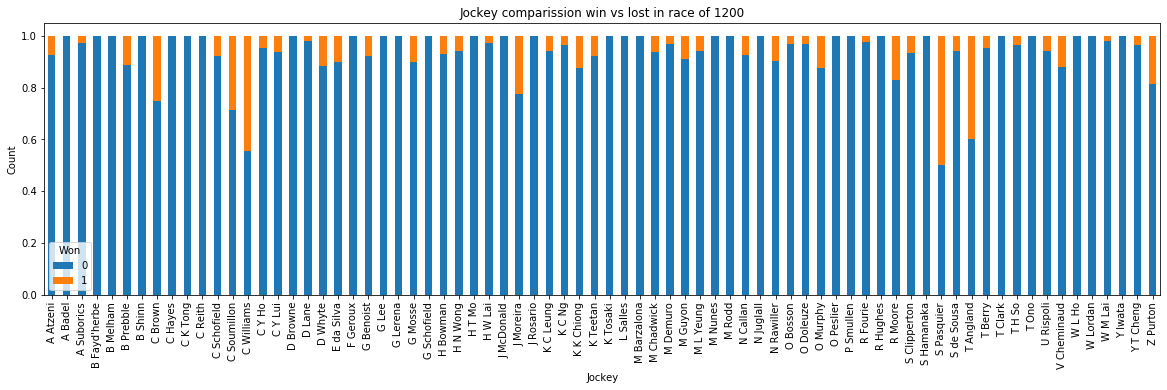

In [226]:
#Percentage of wons by jockey 
percentage_won=pd.crosstab(race_1200_df["Jockey"],race_1200_df["Won"])
percentage_won.div(percentage_won.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,figsize=(20,5))
plt.title("Jockey comparission win vs lost in race of 1200")
plt.xlabel("Jockey")
plt.ylabel("Count")
plt.show()

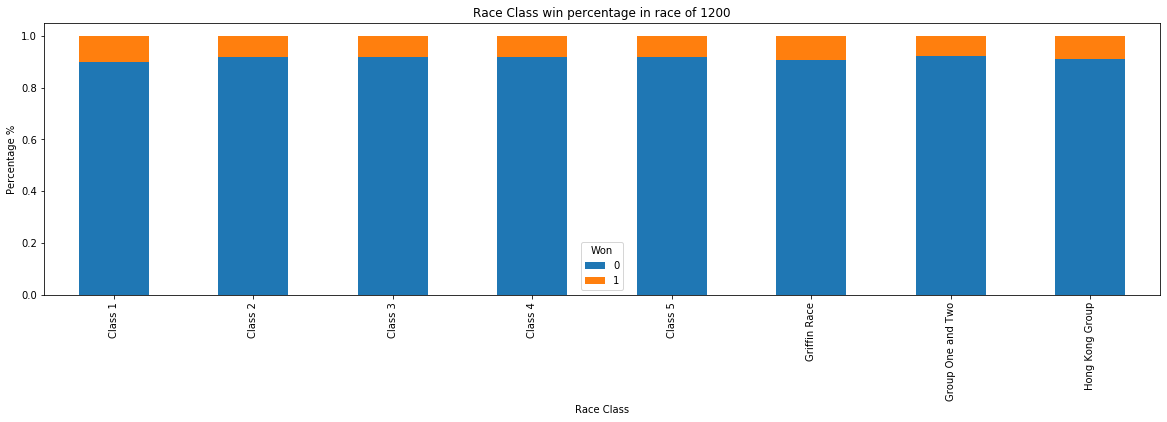

In [227]:
#Race Class percentage of wins is not a variable that defines the race winner
percentage_won=pd.crosstab(race_1200_df["race_class_y"],race_1200_df["Won"])
percentage_won.div(percentage_won.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,figsize=(20,5))
plt.title("Race Class win percentage in race of 1200")
plt.xlabel("Race Class")
plt.ylabel("Percentage %")
plt.show()

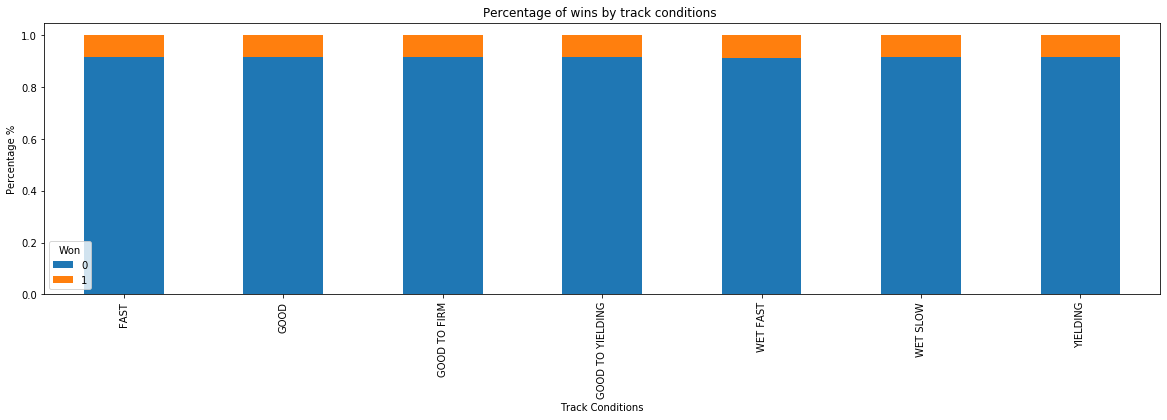

In [228]:
percentage_won=pd.crosstab(race_1200_df["Surface_condition"],race_1200_df["Won"])
percentage_won.div(percentage_won.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,figsize=(20,5))
plt.title("Percentage of wins by track conditions ")
plt.xlabel("Track Conditions")
plt.ylabel("Percentage %")
plt.show()



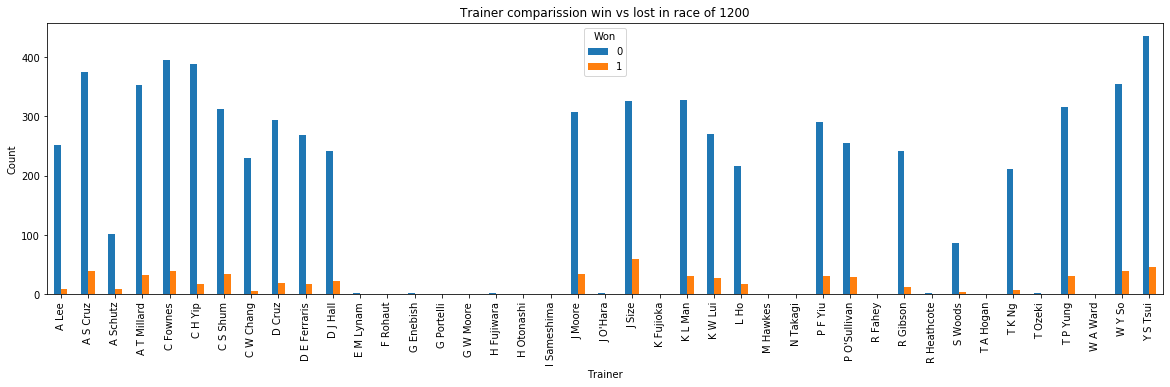

In [229]:
#Trainer is a clear out put
pd.crosstab(race_1200_df["Trainer"],race_1200_df["Won"]).plot(kind='bar',figsize=(20,5))
plt.title("Trainer comparission win vs lost in race of 1200")
plt.xlabel("Trainer")
plt.ylabel("Count")
plt.show()

In [230]:
s = race_1200_df
a = pd.get_dummies(s["race_class_y"],prefix="race_class_y")
b = pd.get_dummies(s["Surface_condition"],prefix="Surface_condition")
c = pd.get_dummies(s["Horse_name"],prefix="Horse_name")
d = pd.get_dummies(s["Trainer"],prefix="Trainer")
e = pd.get_dummies(s["Jockey"],prefix="Jockey")



In [149]:
binary_table = s.join(e)
#binary_table = binary_table.join(b)
#binary_table = binary_table.join(c)
binary_table = binary_table.join(d)
#binary_table = binary_table.join(a)

In [150]:
data_vars=binary_table.columns.values.tolist()
cat_vars=['race_class_y','Surface_condition','Horse_name','Trainer','Jockey']
to_keep=[i for i in data_vars if i not in cat_vars]
binary_table = binary_table[to_keep]


In [151]:
binary_table.to_csv("binary_table.csv",index = False)
binary_table.head(3)

,Won,Jockey_A Atzeni,Jockey_A Badel,Jockey_A Suborics,Jockey_B Fayd'herbe,Jockey_B Melham,Jockey_B Prebble,Jockey_B Shinn,Jockey_C Brown,Jockey_C Hayes,...,Trainer_R Gibson,Trainer_R Heathcote,Trainer_S Woods,Trainer_T A Hogan,Trainer_T K Ng,Trainer_T Ozeki,Trainer_T P Yung,Trainer_W A Ward,Trainer_W Y So,Trainer_Y S Tsui
13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [152]:
#Set the independant variables
X = binary_table.loc[:, binary_table.columns != 'Won']
#Set the dependant variables
y = binary_table.loc[:, binary_table.columns == 'Won']

In [155]:
#This algo will take a sample of the data

import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

os = SMOTE(random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

columns = X_train.columns

os_data_X,os_data_y=os.fit_sample(X_train, y_train)

os_data_X = pd.DataFrame(data=os_data_X,columns=columns )

os_data_y= pd.DataFrame(data=os_data_y,columns=['Won'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no winners in oversampled data",len(os_data_y[os_data_y['Won']==0]))
print("Number of Winners",len(os_data_y[os_data_y['Won']==1]))
print("Proportion of no winners data in oversampled data is ",len(os_data_y[os_data_y['Won']==0])/len(os_data_X))
print("Proportion of winners data in oversampled data is ",len(os_data_y[os_data_y['Won']==1])/len(os_data_X))

length of oversampled data is  9634
Number of no winners in oversampled data 4817
Number of Winners 4817
Proportion of no winners data in oversampled data is  0.5
Proportion of winners data in oversampled data is  0.5


In [156]:
data_final_vars=binary_table.columns.values.tolist()
y=['Won']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)



/home/mario/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/mario/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.htm

[False False False False False  True False  True False  True  True False
 False  True False False False False  True False False False False  True
  True  True False False  True False  True  True False False False  True
 False False False False False False False False False False  True False
  True False False False False False False False False False False  True
 False False False False False False False False False False False False
 False  True False False False False False False False False False False
 False False False  True False False False False False False False False
 False False False False  True False  True False False False False False
 False False False False False False False]
[47 59 50 61 72  1 62  1 79  1  1  4 58  1  9 16 76 48  1 12 90 57 74  1
  1  1 17 19  1 30  1  1 84 11 52  1  6 88 69 66  3 49 20 21 86 92  1 93
  1 26 51 13 63 95 23 94  2 29 85  1 18 56 53 83 45 70 22 10 67 55 54 87
 33  1 39  7  8 35 27 46 24 43 42 40 38 73 96  1 80 75 64 77 68 36 65 32
 60 37 

In [157]:
best_var=pd.DataFrame({
    "X Values":X,
    "True or False":rfe.support_
                      })
best_var=best_var.loc[best_var["True or False"]==True]
best_var

,X Values,True or False
5,Jockey_B Prebble,True
7,Jockey_C Brown,True
9,Jockey_C K Tong,True
10,Jockey_C Reith,True
13,Jockey_C Williams,True
18,Jockey_D Whyte,True
23,Jockey_G Lerena,True
24,Jockey_G Mosse,True
25,Jockey_G Schofield,True
28,Jockey_H T Mo,True


In [158]:
cols=[]

best_var.iloc[19,0]

for x in range(len(best_var)-1):
    cols.append(best_var.iloc[x,0])
X=os_data_X[cols]
y=os_data_y["Won"]



In [159]:
#Calculate the Regression model 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [160]:
#Accuracy of the model 
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.65


# F ) FINAL CONCLUSIONS

  1. It's hard to predict the winning odds only using characteristics of horse: sex, age, weight
  2. It's better to follow the historic data of horses/jockeys/trainers
  3. Races are designed to be competitive and to handicap winning horses with weight and rankings
  4. Draw is a good variable to take into consideration.
  5. While higher the class rank of the race, the higher are the prizes
